# Speed improvement over original numpy functions

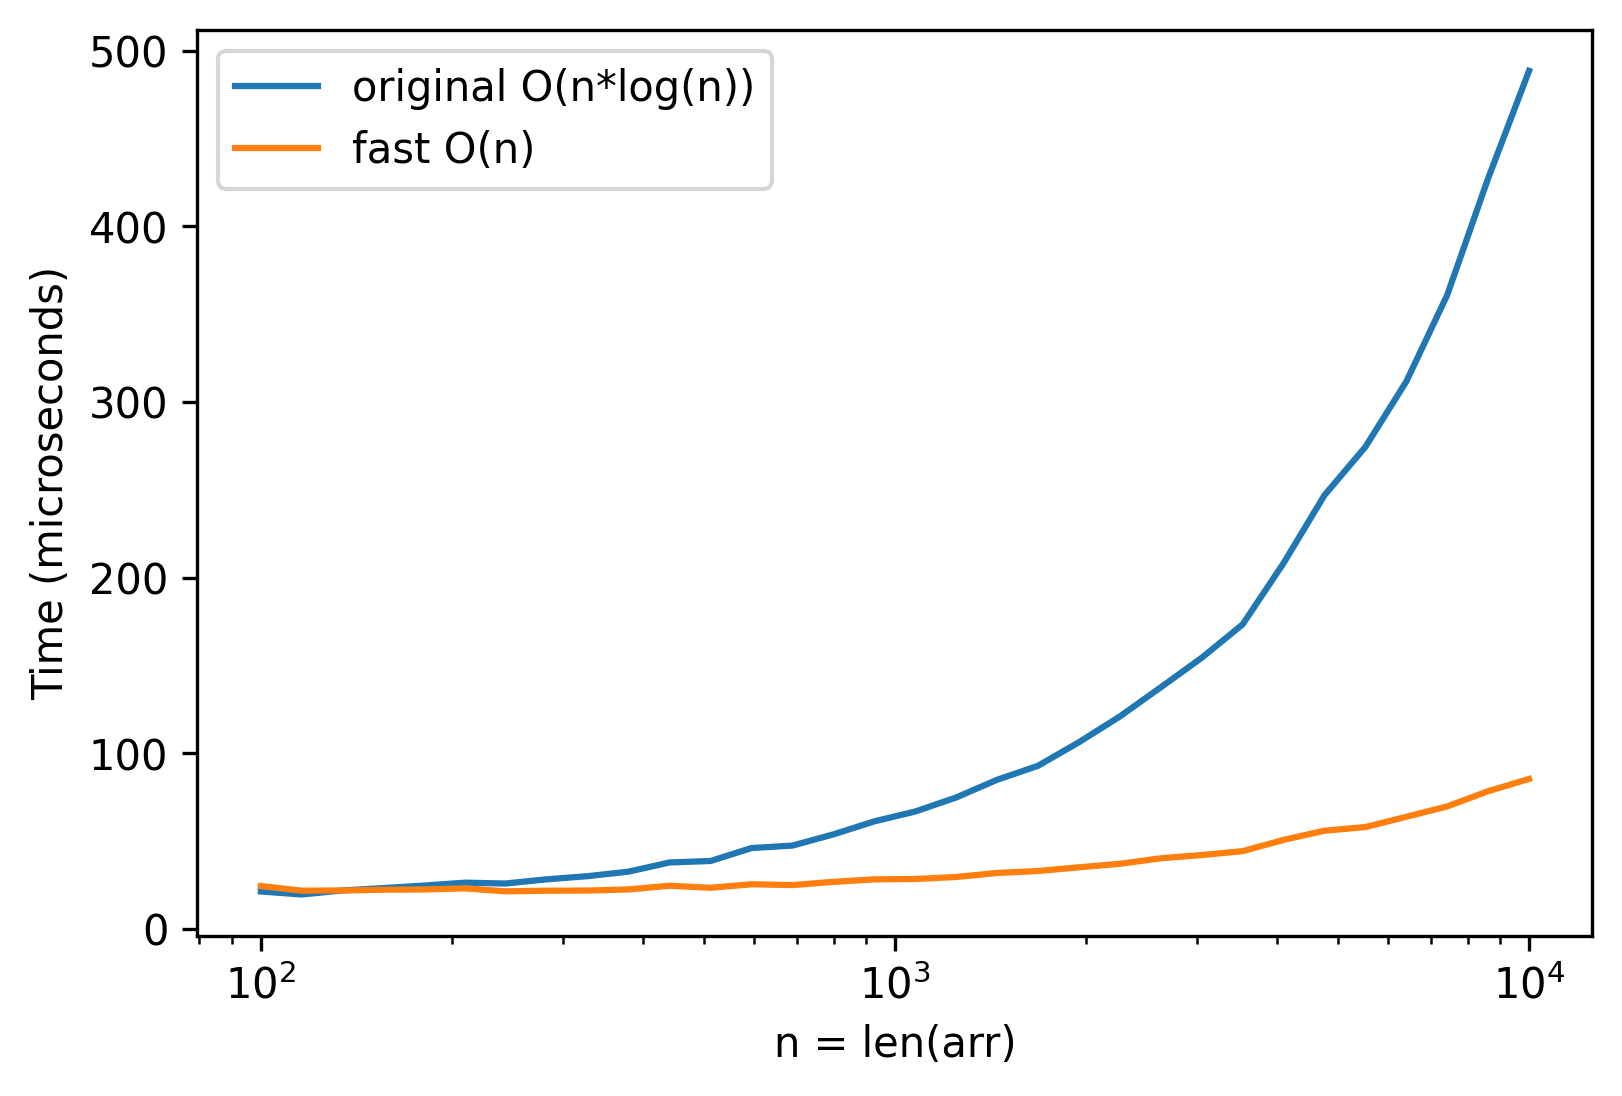

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

from utils import np_unique_int_fast


n_repeat=1024
sizes = np.logspace(2, 4, num=32, dtype=int)
original, fast = [], []
for n in sizes:
    nums = np.random.randint(5, 128, size=(n_repeat, n))
    o, f = 0, 0
    for i, tmp in enumerate(nums):
        t1 = datetime.now()
        np.unique(tmp, return_index=True, return_inverse=True)
        t2 = datetime.now()
        np_unique_int_fast(tmp)
        t3 = datetime.now()
        o += (t2 - t1).microseconds
        f += (t3 - t2).microseconds
    original.append(o / n_repeat)
    fast.append(f / n_repeat)

plt.figure(dpi=300)
plt.plot(sizes, original, label="original O(n*log(n))")
plt.plot(sizes, fast, label="fast O(n)")
plt.xlabel("n = len(arr)")
plt.ylabel("Time (microseconds)")
plt.xscale("log")
plt.legend()
plt.show()